# Superstore Sales Prediction

## Section 1: Business Understanding

#### Background:

•	The retail sector is a highly competitive, and businesses are constantly looking for ways to increase sales and gain a competitive advantage.

•	One way retailers achieve this is by using data analytics and machine learning to gain insight   into customer behavior and preferences.


#### Problem Statement

To predict the sales of retail store products based on the various products and outlet features to gain infomation into customer behavior and preferences which would help to boost up the overall revenue.

#### Objective

•	To develop a model to predict the sale by different category using the target variable as (Item_Outlet_Sales)

•	Use different performance measures to evaluate the model, such as mean absolute error (MAE) and root mean squared error (RMSE)

•	Make data-driven choices based on the insights obtained to enhance sales success and profitability.


## Section 2: Data Understanding

#### Data Capture and Explanation

The dataset used in this project includes the information on products and thier sales. The dataset has been downloaded from Kaggle.com

Following are the features of the dataset

•	Item_Identifier:           Each item is assigned a unique code.

•	Item_Weight:               The weight of the item.

•	Item_Fat_Content:          Specifies whether an item is regular or low fat.

•	Item_Visibility:           The percentage of total display area allotted to a particular item in a shop.

•	Item_Type:                 The categorization of the item.

•	Item_MRP:                  Maximum list price of the item(in dollars).

•	Outlet_Identifier:         Each outlet is assigned a unique code.

•	Outlet_Establishment_Year: The establishment year of the outlet.

•	Outlet_Size:               The outlet's size in terms of ground area covered.

•	Outlet_Location_Type:      The city/town in which the outlet is located.

•	Outlet_Type:               Whether the establishment is a chain or not, a grocery store, or a supermarket.

•	Item_Outlet_Sales:         The item's sales in that particular outlet


#### Data Exploration

Before starting any prediction, it is important to visulize the data and gain insights into data and identify any pattern.
This section would majorly cover exploring the dataset

In [1]:
#### Data ExplorationBefore starting any prediction, it is important to visulize the data and gain insights into data and identify any pattern.
#### This section would majorly cover exporing the dataset #importing neccessary libraries..
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
#load the dataset..
df=pd.read_csv('Train_data_for_project.csv')

In [3]:
# display the information of the dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Obeservation: There are values MISSING in feature Item_Weight and Outlet_Size. We will taking care of these missing value in the upcoming sections**

In [4]:
#Checking the feature and the data in each feature by selecting first 5 records
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking the same for last 5 records
#Gives us the sense check if the data has been imported well or not. In this case it is imported well.
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
#Peforming the statistical analysis for all the features
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


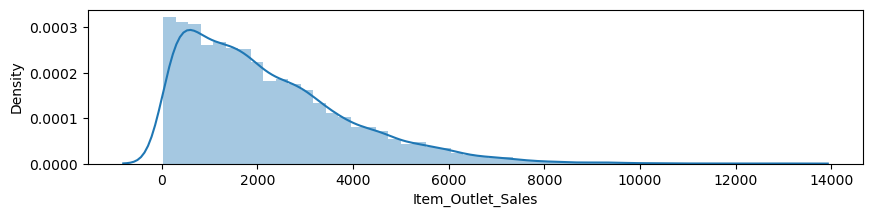

In [7]:
#Let understand the distribution of the data in our target variable sales
plt.figure(figsize=(10, 2))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

**Observation: The sales data is positively skewed. This shows a positive trend that the high value sales are less and healthy sales amounts is between 0 and 2000**

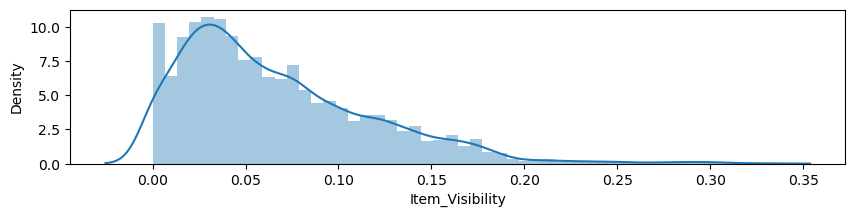

In [8]:
plt.figure(figsize=(10, 2))
sns.distplot(df['Item_Visibility'])
plt.show()

**Observation: There are multiple products falling under 0 visibility and it may be due to lack of promotion for these products.**

<AxesSubplot:ylabel='Item_Fat_Content'>

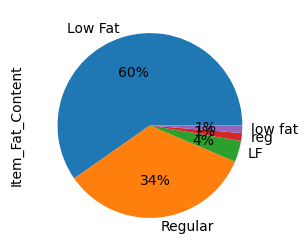

In [9]:
#Bifurcation of low and Regular fat products
plt.figure(figsize=(3, 3))
df.Item_Fat_Content.value_counts(ascending = False).plot(kind='pie',autopct='%.f%%')

**Observation:**

**1. This graph shows the products are of two type either Low Fat or Regular Fat.**

**2. But there is slight discrepancy in data i.e.**
   **Low Fat is also mentioned as low fat or LF**
   **and Regular is mentioned as reg as well which needs to be corrected**
**3. We will be updating the names in the coming sections**

<AxesSubplot:>

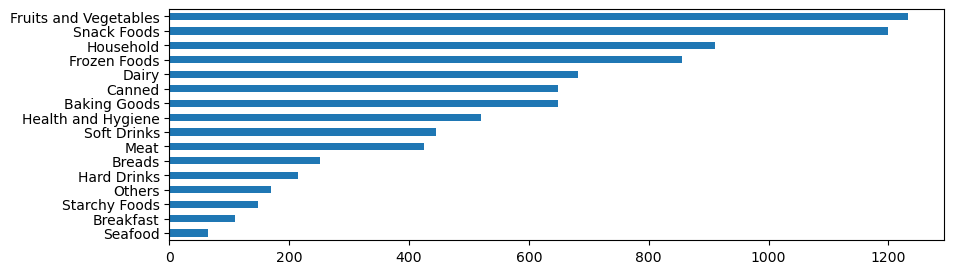

In [10]:
plt.figure(figsize=(10, 3))
df.Item_Type.value_counts(ascending = True).plot(kind='barh')

**Observation: Fruits and vegetables are the top most selling products followed by snack foods and hosehold products
Starchy foods, breakfast and seafood are the least selling products**

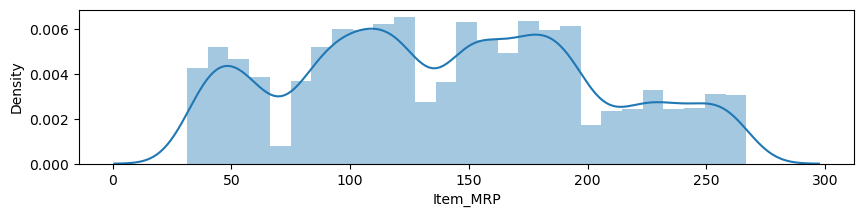

In [11]:
#Checking the Price Range
plt.figure(figsize=(10, 2))
sns.distplot(df['Item_MRP'])
plt.show()

**Observation: The most of the products are in the range of 75-125 or 140 -200**

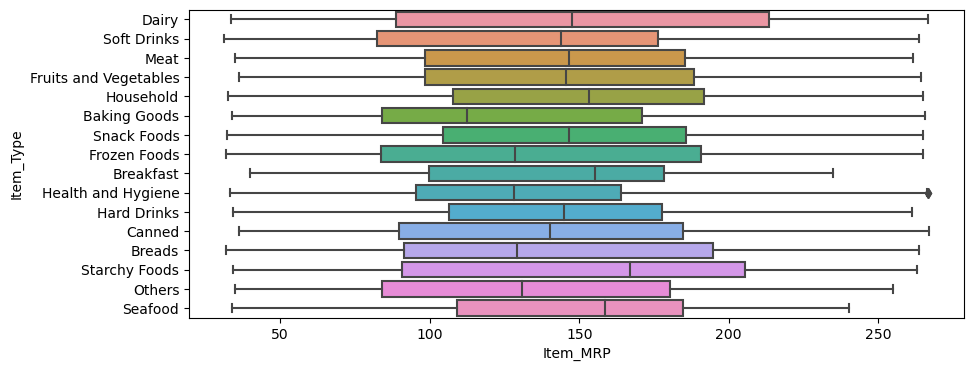

In [12]:
#Now lets check what is the price range of each product
plt.figure(figsize = (10,4))
sns.boxplot(y="Item_Type", x="Item_MRP", data=df)
plt.show()

**Observation: All of the products range from between 80 to 180**

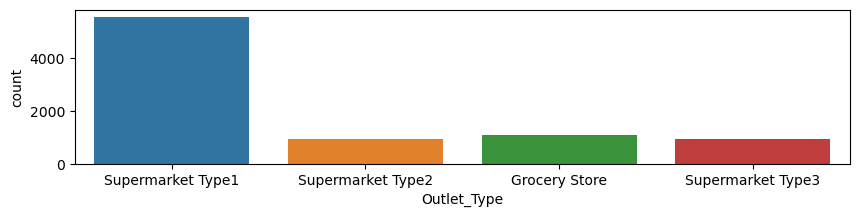

In [13]:
plt.figure(figsize=(10,2))
sns.countplot(x='Outlet_Type', data=df)
plt.show()

**Observation: Most of the stores are of Supermarket type 1**

Text(0, 0.5, 'Item_Outlet_Sales')

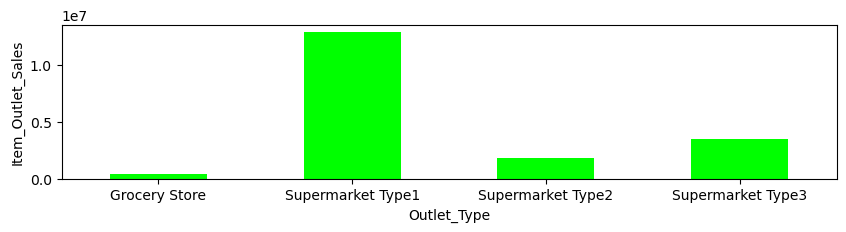

In [14]:
plt.figure(figsize = (10,2))
df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind ='bar',color='#00FF00')
plt.xticks(rotation=0)
plt.ylabel('Item_Outlet_Sales')

**Observation: Most of the sales are reflecting from Supermarket Type 1**

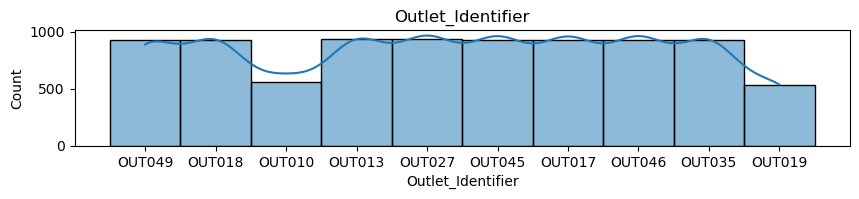

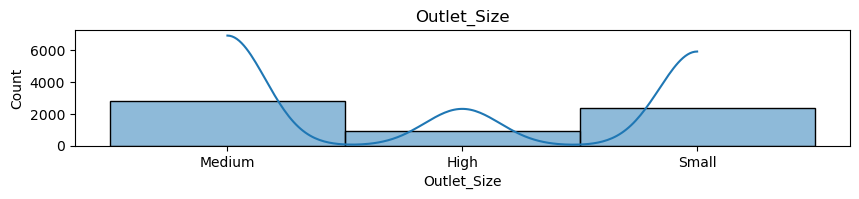

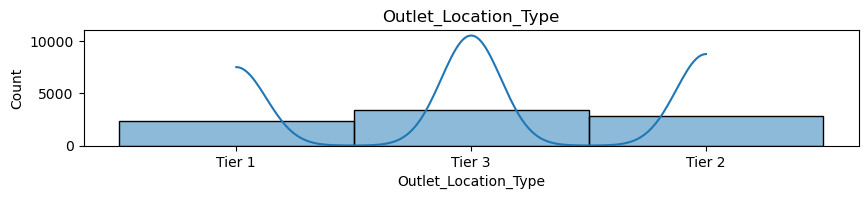

In [15]:
columns=['Outlet_Identifier','Outlet_Size','Outlet_Location_Type']

for column in columns:
    plt.figure(figsize=(10,1.5))
    sns.histplot(x=column, data=df,kde=True)
    plt.title(column)
    plt.show()

**Observation:**
**1. Outlets excluding 10 and 19 are more than 800**
**2. Medium sized and small outlets are more than 2000 while high size are less than 500**
**3. Most of the outlets are located in tier 3 cities**

#### Now let's group some feautes and understand the data 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Type'>

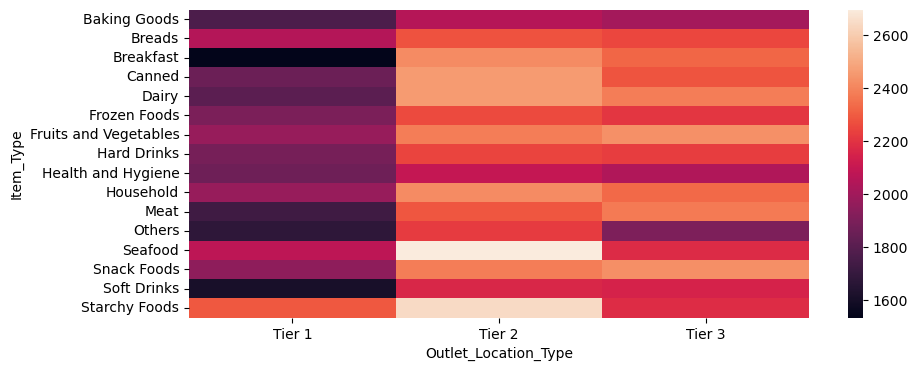

In [16]:
plt.figure(figsize = (10,4))
tabs = df.pivot_table(values = 'Item_Outlet_Sales', index  = 'Item_Type' , columns = 'Outlet_Location_Type')
sns.heatmap(tabs)

**Observation:**

**1. This intensity map clearly shows that Tier 1 is doing well in Sales for all the products**

**2. Soft drinks and Breakfast make the most of the sales there**

**3. Seafood and Starchy food makes the least sale in Tier 2**

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

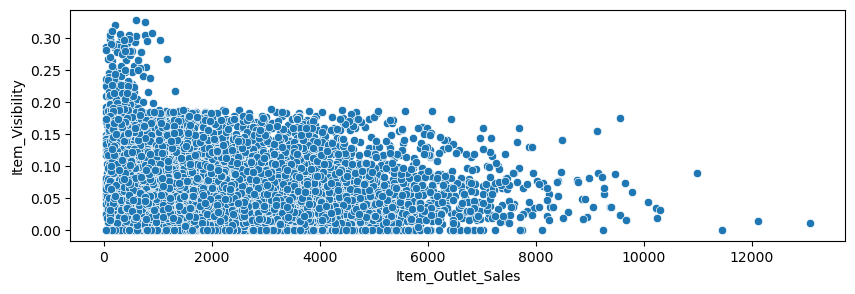

In [17]:
plt.figure(figsize = (10,3))
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = df)

**Observation: Lower visible products are generting sales but the sales generated by higly visible products is more**

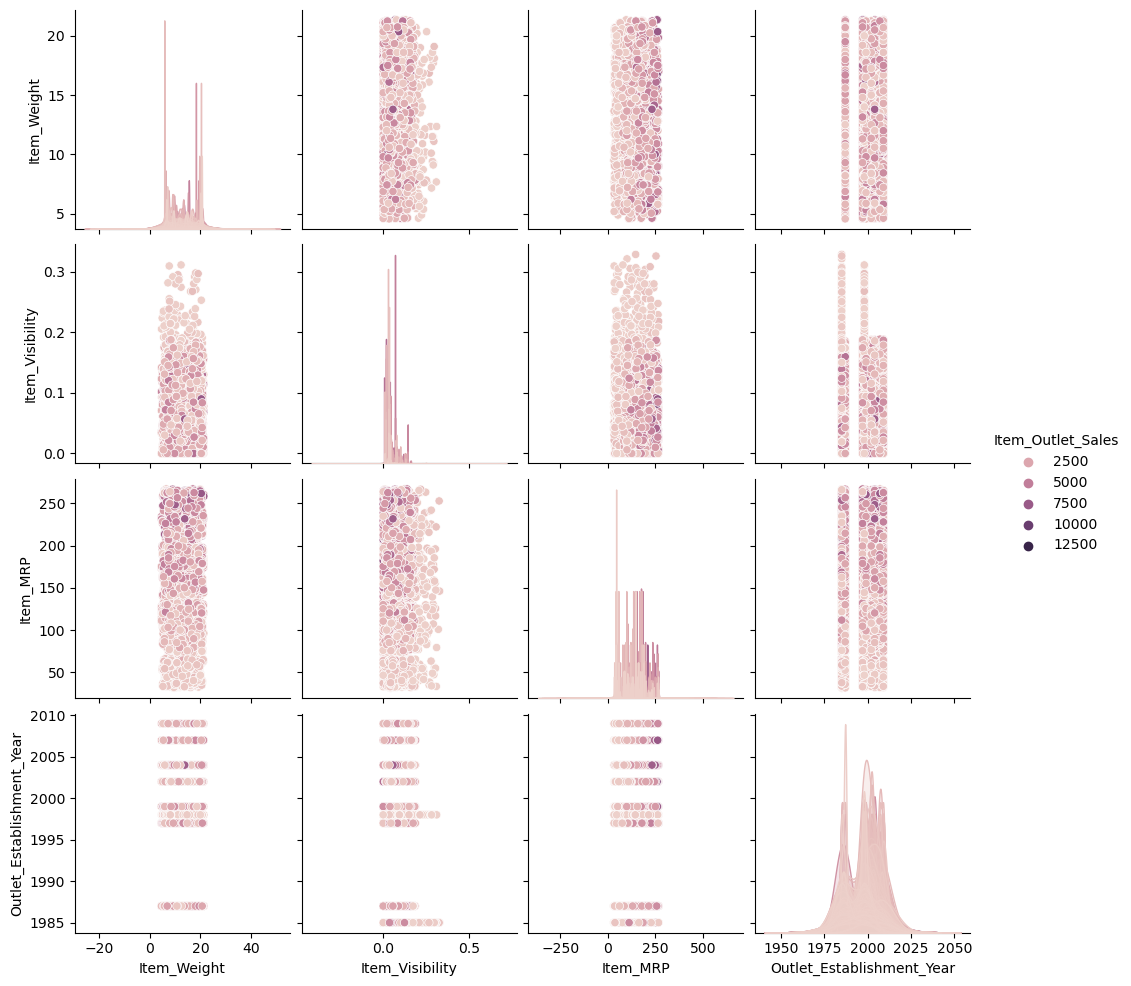

In [18]:
sns.pairplot(df, hue='Item_Outlet_Sales')
plt.show()

**This will produce a pairplot for the dataset df with Item Outlet Sales as the hue. The categorical variable by which to group the data is specified using the hue parameter.**

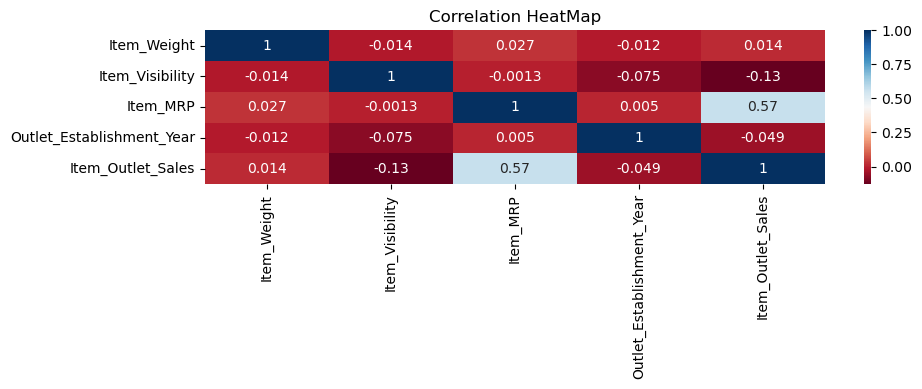

In [19]:
plt.figure(figsize = (10,2))
sns.heatmap(df.corr(),cmap='RdBu',annot=True)
plt.title('Correlation HeatMap')
plt.show()

**This code generates a heatmap to show the correlation matrix between the numerical columns in the dataset. The 'cmap' parameter determines the heatmap's colour scheme, and the 'annot=True' parameter annotates the heatmap cells with numbers. The plot's title is "Correlation HeatMap."**

**From here it can be seen that the 'Item_MRP' AND 'Item_Outlet_Sales' are somewhat correlated, but still its not a very strong correlation, hence it is not a good idea to drop any of these.**

# Section 3: Data Preparation and Feature Engineering

#### Data Preparation:

**Checking missing values and the duplicates and treating them:**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
#Converting Item_Outlet_Sales into the integer datatype.
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)

In [22]:
#checking for null values..
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observation** 

**1. Column'Item_Weight' has missing values.**

**2. Column 'Outlet_Size' also have missing values.**

**It will be treated further during the feature engineering part.**

In [23]:
# Lets check the duplicate values:
df.duplicated().sum()

0

**This shows that the dataset does not has any duplicate values.**

#### Handling the missing values:

 **Column 'Item_Weight' is Numerical, while the Column'Outlet_Size' is Catgeorical.**

**Therefore, the Mean can be used for the imputation of missing values in column 'Item_Weight' ,and the Mode can be used for imputing missing values for the categorical column 'Outlet_Size'.**

**Lets impute the missing values for the Item_Weight column:**

In [24]:
# First calculating the mean of the 'Item_Weight' column:
df.Item_Weight.mean()

12.857645184136183

**Filling the missing values for the 'Item_Weight' column:**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 765.9+ KB


In [26]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observation: From here, it is observed that, there is no missing value in the 'Item_Weight' column now.**

#### Now, impute missing values for 'Outlet_Size':

In [28]:
outlet_size_mode=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [29]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


**Observation: The mode of each type of store is being calculated first and then that value is being imputed in the missing values.This approach is much better than finding the mode of the entire column and then replacing it with the missing values.**

In [30]:
missing_val=df['Outlet_Size'].isnull()

In [31]:
print(missing_val)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [32]:
df.loc[missing_val,'Outlet_Size']=df.loc[missing_val,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

**This will impute the most common type of 'Outlet_Size' corresponding to the mode of 'Outlet_Type' column.**

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Finally, all missing values have been filled.

#### Lets check the Outliers:

In [34]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2180.786577
std,4.226124,0.051598,62.275067,8.371760,1706.497259
min,4.555000,0.000000,31.290000,1985.000000,33.000000
25%,9.310000,0.026989,93.826500,1987.000000,833.500000
50%,12.857645,0.053931,143.012800,1999.000000,1794.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.000000


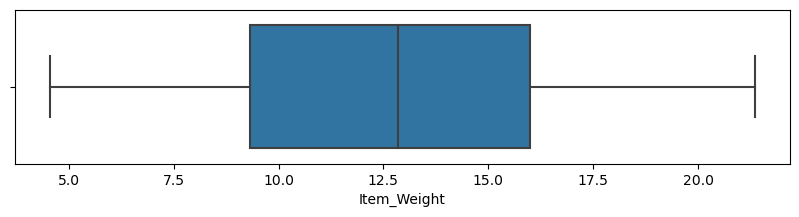

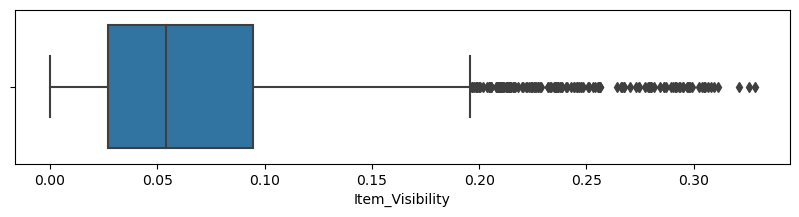

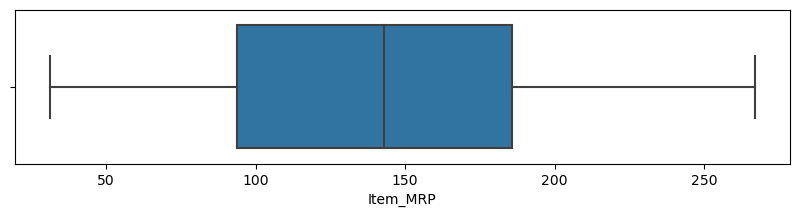

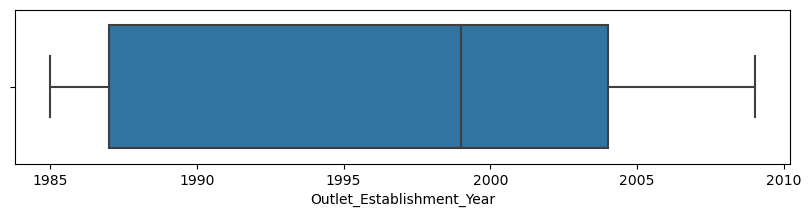

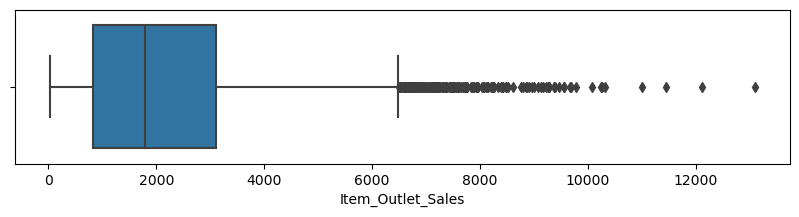

In [35]:
#lets check the outliers for the numerical values using Boxplots:
plt.figure(figsize = (10,2))
sns.boxplot(df.Item_Weight,data=df)
plt.show()
plt.figure(figsize = (10,2))
sns.boxplot(df.Item_Visibility,data=df)
plt.show()
plt.figure(figsize = (10,2))
sns.boxplot(df.Item_MRP,data=df)
plt.show()
plt.figure(figsize = (10,2))
sns.boxplot(df.Outlet_Establishment_Year,data=df)
plt.show()
plt.figure(figsize = (10,2))
sns.boxplot(df.Item_Outlet_Sales,data=df)
plt.show()

**From here, it is observed that the 'Item_Outlet_Sales' column and 'Item_Visibility' column have the Outliers.**

**Lets treat these outliers using the Interquartile range and then changing the values with the median.**

In [36]:
# Calculate Q1, Q3, and IQR
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers with median value
outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]
df.loc[outliers.index, 'Item_Visibility'] = df['Item_Visibility'].median()

In [37]:
# Calculate Q1, Q3, and IQR of the treated dataset
Q1_treated = df['Item_Visibility'].quantile(0.25)
Q3_treated = df['Item_Visibility'].quantile(0.75)
IQR_treated = Q3_treated - Q1_treated

# Calculate lower and upper bounds for outliers in the treated dataset
lower_bound_treated = Q1_treated - 1.5 * IQR_treated
upper_bound_treated = Q3_treated + 1.5 * IQR_treated

# Identify outliers that are still present in the treated dataset
outliers_treated = df[(df['Item_Visibility'] < lower_bound_treated) | (df['Item_Visibility'] > upper_bound_treated)]
num_outliers_remaining = len(outliers_treated)

print(f"Number of outliers remaining: {num_outliers_remaining}")


Number of outliers remaining: 29


In [38]:
# Calculate Q1, Q3, and IQR of the treated dataset
Q1_treated = df['Item_Visibility'].quantile(0.25)
Q3_treated = df['Item_Visibility'].quantile(0.75)
IQR_treated = Q3_treated - Q1_treated

# Calculate lower and upper bounds for outliers in the treated dataset
lower_bound_treated = Q1_treated - 1.5 * IQR_treated
upper_bound_treated = Q3_treated + 1.5 * IQR_treated

# Drop outliers that are still present in the treated dataset
df = df.drop(df[(df['Item_Visibility'] < lower_bound_treated) | (df['Item_Visibility'] > upper_bound_treated)].index)

# Check the number of remaining outliers
print(f"Number of outliers remaining: {len(df[(df['Item_Visibility'] < lower_bound_treated) | (df['Item_Visibility'] > upper_bound_treated)])}")


Number of outliers remaining: 0


#### Feature Engnieering

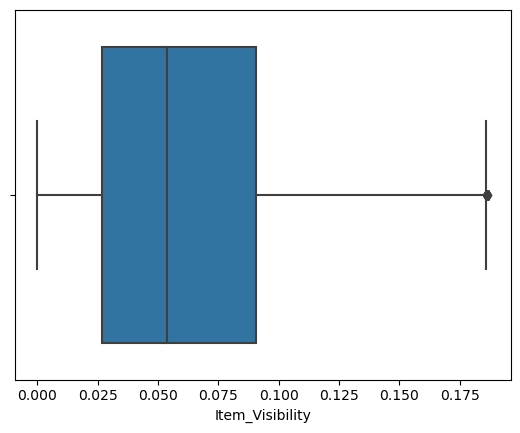

In [39]:
sns.boxplot(df.Item_Visibility,data=df)
plt.show()

In [40]:
# Calculate Q1, Q3, and IQR
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers with median value
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]
df.loc[outliers.index, 'Item_Outlet_Sales'] = df['Item_Outlet_Sales'].median()

In [41]:
# Calculate Q1, Q3, and IQR of the treated dataset
Q1_treated = df['Item_Outlet_Sales'].quantile(0.25)
Q3_treated = df['Item_Outlet_Sales'].quantile(0.75)
IQR_treated = Q3_treated - Q1_treated

# Calculate lower and upper bounds for outliers in the treated dataset
lower_bound_treated = Q1_treated - 1.5 * IQR_treated
upper_bound_treated = Q3_treated + 1.5 * IQR_treated

# Identify outliers that are still present in the treated dataset
outliers_treated = df[(df['Item_Outlet_Sales'] < lower_bound_treated) | (df['Item_Outlet_Sales'] > upper_bound_treated)]
num_outliers_remaining = len(outliers_treated)

print(f"Number of outliers remaining: {num_outliers_remaining}")


Number of outliers remaining: 65


In [42]:
# Calculate Q1, Q3, and IQR of the treated dataset
Q1_treated = df['Item_Outlet_Sales'].quantile(0.25)
Q3_treated = df['Item_Outlet_Sales'].quantile(0.75)
IQR_treated = Q3_treated - Q1_treated

# Calculate lower and upper bounds for outliers in the treated dataset
lower_bound_treated = Q1_treated - 1.5 * IQR_treated
upper_bound_treated = Q3_treated + 1.5 * IQR_treated

# Drop outliers that are still present in the treated dataset
df = df.drop(df[(df['Item_Outlet_Sales'] < lower_bound_treated) | (df['Item_Outlet_Sales'] > upper_bound_treated)].index)

# Check the number of remaining outliers
print(f"Number of outliers remaining: {len(df[(df['Item_Outlet_Sales'] < lower_bound_treated) | (df['Item_Outlet_Sales'] > upper_bound_treated)])}")


Number of outliers remaining: 0


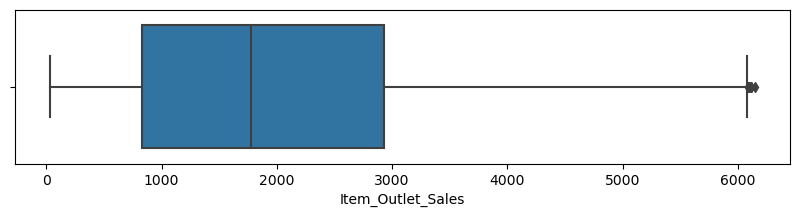

In [43]:
plt.figure(figsize = (10,2))
sns.boxplot(df.Item_Outlet_Sales,data=df)
plt.show()

**NOTE:**

**1. Even after the treatment , there are outliers in both of these, and no further treatment should be done on these,until and unless specified by the domain experts.**

**2. Also, dropping higher number of outliers wont be a good idea, otherwise this would result in wrong predictions.**

In [1]:
#lets again check the basic statistics after the imputation:

In [45]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8429.000000,8429.000000,8429.000000,8429.000000,8429.000000
mean,12.861682,0.062491,140.467952,1997.855736,2024.949223
std,4.232575,0.045245,62.145916,8.364009,1447.071329
min,4.555000,0.000000,31.290000,1985.000000,33.000000
25%,9.310000,0.026950,93.512000,1987.000000,833.000000
50%,12.857645,0.053688,142.147000,1999.000000,1780.000000
75%,16.000000,0.090596,185.192400,2004.000000,2934.000000
max,21.350000,0.186826,266.888400,2009.000000,6145.000000


**ALSO, IT IS ESSENTIAL TO CORRECT THE 'Item_Fat_Content' Column, as it has the incorrect labels for the categories, 'low fat' and the 'Regular'.**

Lets do it

In [46]:
df.Item_Fat_Content.value_counts()

Low Fat    5032
Regular    2857
LF          313
reg         116
low fat     111
Name: Item_Fat_Content, dtype: int64

In [47]:
# Now, the values in the LF,low fat needs to be in Low Fat.Also, the values in reg needs to be in Regular.
df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [48]:
# lets again check the  'Item_Fat_Content' column:
df.Item_Fat_Content.value_counts()

Low Fat    5456
Regular    2973
Name: Item_Fat_Content, dtype: int64

**Now, we can proceed to label Encoding:**

**LETS, CONVERT THE CATEGORICAL COLUMNS INTO NUMERICALS:**

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder=LabelEncoder()

In [51]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [52]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097
3,1120,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732
4,1296,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778
8519,896,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549
8520,1356,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845


In [53]:
# Now, lets proceed forward for the standardization, to bring all the features in particular range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 # Standardization
df_scaled= scaler.fit_transform(df)

In [54]:
 df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [55]:
df_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100193,0.282525,0.0,0.085894,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.605694
1,0.005138,0.081274,1.0,0.103188,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.067081
2,0.425177,0.770765,0.0,0.089710,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.337696
3,0.719332,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,1.0,1.0,0.000000,0.114365
4,0.832370,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.157232
...,...,...,...,...,...,...,...,...,...,...,...,...
8424,0.237636,0.137541,0.0,0.303938,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333,0.449116
8425,0.575466,0.227746,1.0,0.251477,0.000000,0.326263,0.777778,0.708333,1.0,0.5,0.333333,0.084424
8426,0.870906,0.359929,0.0,0.188337,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333,0.189791
8427,0.437380,0.158083,1.0,0.777305,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667,0.296466


# Data Splitting to form train and test data

In [56]:
X=df_scaled.drop(columns='Item_Outlet_Sales',axis=1)
Y=df['Item_Outlet_Sales']

In [57]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100193,0.282525,0.0,0.085894,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005138,0.081274,1.0,0.103188,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.425177,0.770765,0.0,0.089710,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719332,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,1.0,1.0,0.000000
4,0.832370,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8424,0.237636,0.137541,0.0,0.303938,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333
8425,0.575466,0.227746,1.0,0.251477,0.000000,0.326263,0.777778,0.708333,1.0,0.5,0.333333
8426,0.870906,0.359929,0.0,0.188337,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333
8427,0.437380,0.158083,1.0,0.777305,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667


In [58]:
Y

0       3735
1        443
2       2097
3        732
4        994
        ... 
8518    2778
8519     549
8520    1193
8521    1845
8522     765
Name: Item_Outlet_Sales, Length: 8429, dtype: int32

In [59]:
# Data slpitting into train and test data

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [61]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((5900, 11), (2529, 11), (5900,), (2529,))

# Section 4: Modelling and Pipelines Creation

# 1.Linear Regression

#### 1a.  Linear Regression without essembling techniques..

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [63]:
lr.fit(X_train,Y_train)

LinearRegression()

In [64]:
Y_Pred=lr.predict(X_test)

In [65]:
Y_Pred

array([2856.66604594, 1381.0131416 , 2549.26231732, ..., 3177.75343371,
       2073.33877622, 2548.88592465])

In [66]:
Y_test

3783    4074
61      1062
6088    5946
3364    2241
444     3401
        ... 
8164     973
4762    2024
2983    4910
7929    1874
394     3259
Name: Item_Outlet_Sales, Length: 2529, dtype: int32

In [67]:
# checking the mean squared error and root mean squared error
mse1 = mean_squared_error(Y_test, Y_Pred)
rmse1 = mean_squared_error(Y_test, Y_Pred, squared=False)
mae1=mean_absolute_error(Y_test, Y_Pred)


In [68]:
import numpy as np

# Assuming Y_test and Y_Pred are arrays containing the test targets and predicted values
y_mean = np.mean(Y_test)
ss_tot = np.sum((Y_test - y_mean)**2)
ss_res = np.sum((Y_test - Y_Pred)**2)
r1 = 1 - (ss_res / ss_tot)

In [69]:
print('Mean_Squared_Error =',mse1)
print('Root_Mean_Squared_Error =',rmse1)
print('Mean Absolute Error',mae1)
print("R-squared score:", r1)


Mean_Squared_Error = 1174004.6374281626
Root_Mean_Squared_Error = 1083.514945641343
Mean Absolute Error 839.4210014187095
R-squared score: 0.44327095902101343


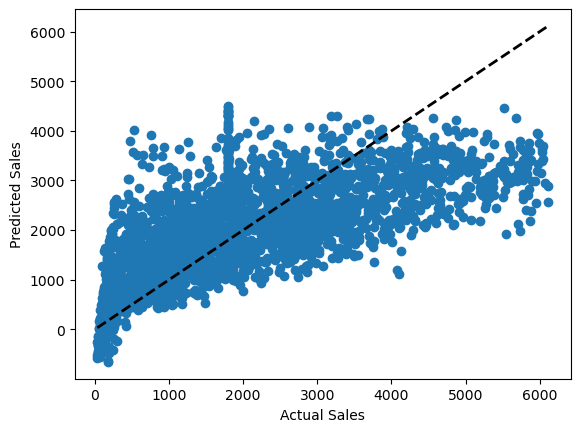

In [70]:
plt.scatter(Y_test, Y_Pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()

The actual and predicted sales values are contrasted in this scatter plot. The ideal situation, in which the predicted values exactly match the actual values, is represented by the diagonal line.

The model's predictions are close to the actual values if the points are dispersed along the diagonal line. The model's predictions are not reliable if the points are far from the diagonal line.

In general, the model performs better the closer the points are to the diagonal line.

In this plot point are closer to diagonal line so model is better for sales prediction.

#### 1b. Linear regression with Ensembling techniques.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

# Create a linear regression model
lin_reg_1 = LinearRegression()

# Create a bagging regressor with the linear regression model as the base estimator
bag_reg_1 = BaggingRegressor(base_estimator=lin_reg_1, n_estimators=10, random_state=42)

# Fit the bagging regressor to the training data
bag_reg_1.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_lr= bag_reg_1.predict(X_test)

# Calculate evaluation metrics
mse2 = mean_squared_error(Y_test, y_pred_lr)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(Y_test, y_pred_lr)


print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("Mean Absolute Error:", mae2)


# Assuming Y_test and Y_Pred are arrays containing the test targets and predicted values
y_mean_lr = np.mean(Y_test)
ss_tot_lr= np.sum((Y_test - y_pred_lr)**2)
ss_res_lr= np.sum((Y_test - y_pred_lr)**2)
r2= 1 - (ss_res_lr/ ss_tot_lr)

r2 = r2_score(Y_test, y_pred_lr)
print("R-squared score:", r2)

Mean Squared Error: 1174546.1407432545
Root Mean Squared Error: 1083.7647995498166
Mean Absolute Error: 838.9089548634582
R-squared score: 0.443014170749752


#### COMPARING VALUE BETWEEN LINEAR REGRESSION WITH OR WITHOUT ENSEMBLING TECHNIQUES

**WITHOUT ENSEMBLING**

Mean_Squared_Error = 1174004.6374281626

Root_Mean_Squared_Error = 1083.514945641343

Mean Absolute Error 839.4210014187094

R-squared score: 0.44327095902101343

    
**WITH ENSEMBLING**

Mean Squared Error: 1174546.1407432542

Root Mean Squared Error: 1083.7647995498166

Mean Absolute Error: 838.9089548634582

R-squared score: 0.44301417074975213
    
**By comparing the values , it seems that there is no difference in values by using ensembling techniques.Simply, we can move foward with simple linear regression method**   


# 2.DecisionTreeRegressor

#####  2a.  IMPLEMENTING DECISION TREE WITHOUT ENSEMBLE TECHNIQUE & GETTING METRICS

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [74]:
Y_Pred_DT=DT.predict(X_test)

In [75]:
mse3 = mean_squared_error(Y_test, Y_Pred_DT)
rmse3= mean_squared_error(Y_test, Y_Pred_DT, squared=False)
mae3=mean_absolute_error(Y_test, Y_Pred_DT)
import numpy as np

# Assuming Y_test and Y_Pred are arrays containing the test targets and predicted values
y_mean_DT = np.mean(Y_test)
ss_tot_DT = np.sum((Y_test - y_mean_DT)**2)
ss_res_DT = np.sum((Y_test - Y_Pred_DT)**2)
r3 = 1 - (ss_res_DT/ ss_tot_DT)
print("R-squared score: %.2f"% r3)



print('Mean_Squared_Error =',mse3)
print('Root_Mean_Squared_Error =',rmse3)
print('Mean Absolute Error=',mae3)


R-squared score: 0.07
Mean_Squared_Error = 1952504.5824436536
Root_Mean_Squared_Error = 1397.3205009745093
Mean Absolute Error= 991.8730723606168


##### 2b. IMPLEMENTING DT WITH ENSEMBLE TECHNIQUE(BAGGING)

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define the decision tree regressor with random state for reproducibility
dt_regressor = DecisionTreeRegressor(random_state=2017)

# Use cross-validation to evaluate the performance of the stand-alone decision tree
cv_scores_dt = cross_val_score(dt_regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree (stand-alone) - Train:", -cv_scores_dt.mean())

# Define the bagging regressor with decision tree as the base estimator and random state for reproducibility
bagging_regressor = BaggingRegressor(base_estimator=dt_regressor, n_estimators= 10,random_state=7)

# Use cross-validation to evaluate the performance of the bagging regressor
cv_scores_bag_dt = cross_val_score(bagging_regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree (Bagging) - Train:", -cv_scores_bag_dt.mean())


# Fit and predict using the bagging regressor
bagging_regressor.fit(X_train, Y_train)
y_pred_DT_BAG = bagging_regressor.predict(X_test)

# calculating the evaluation metrics:
mse4 = mean_squared_error(Y_test,y_pred_DT_BAG)
rmse4= mean_squared_error(Y_test,y_pred_DT_BAG, squared=False)
mae4=mean_absolute_error(Y_test,y_pred_DT_BAG)
print('Mean_Squared_Error =',mse4)
print('Root_Mean_Squared_Error =',rmse4)
print('Mean Absolute Error=',mae4)

y_mean4 = np.mean(Y_test)
ss_tot4 = np.sum((Y_test - y_mean4)**2)
ss_res4 = np.sum((Y_test - y_pred_DT_BAG)**2)
r4 = 1 - (ss_res4 /ss_tot4)
print("R-squared score: %.2f" % r4)


Decision Tree (stand-alone) - Train: 2006814.7154237288
Decision Tree (Bagging) - Train: 1144164.5459711864
Mean_Squared_Error = 1124993.221826809
Root_Mean_Squared_Error = 1060.6569765135234
Mean Absolute Error= 772.9119810201661
R-squared score: 0.47


#### COMPARING THE VALUES OF DECISION TREE

**WITHOUT ENSEMBLING TECHNIQUES**

R-squared score: 0.09

Mean_Squared_Error = 1913285.9272439699

Root_Mean_Squared_Error = 1383.2157920020902

Mean Absolute Error= 990.7924080664294

**WITH ENSEMBLING TECHNIQUES**

Mean_Squared_Error = 1124993.221826809

Root_Mean_Squared_Error = 1060.6569765135234

Mean Absolute Error= 772.9119810201661

R-squared score: 0.47


**According to the evaluation metrics, the model with ensemble techniques appears to perform better than the model without ensemble techniques. The ensemble model has a much higher R-squared score (0.47) than the non-ensemble model (0.09), indicating that the ensemble model explains more of the variance in the target variable. Furthermore, the ensemble model has lower mean squared error, root mean squared error, and mean absolute error than the non-ensemble model, indicating better overall performance.**

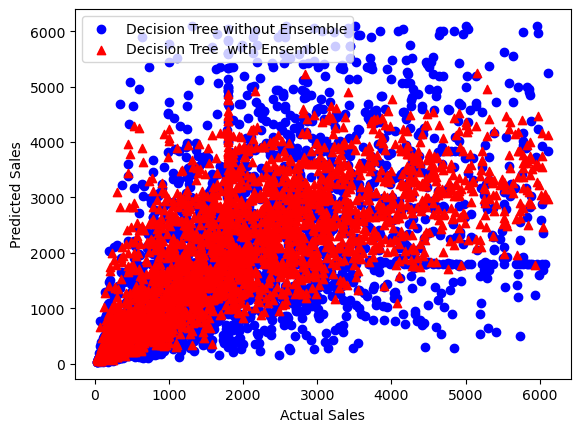

In [77]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted sales for linear regression without ensemble
plt.scatter(Y_test, Y_Pred_DT, c='blue', marker='o', label='Decision Tree without Ensemble')

# Scatter plot for actual vs predicted sales for linear regression with ensemble
plt.scatter(Y_test, y_pred_DT_BAG, c='red', marker='^', label='Decision Tree  with Ensemble')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend(loc='upper left')
plt.show()


We can compare the models' performance by observing how closely the points align with the diagonal line, which represents perfect prediction. A model with more closely aligned points will perform better. so here the decision tree with ensemble techniques is close to the diagonal line.

# 3. RandomForestRegressor

**3a.IMPLMENTING RANDOM FOREST WITHOUT ENSEMBLE TECHNIQUE(BAGGING)**

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
forest_reg = RandomForestRegressor()

In [80]:
forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [81]:
y_pred_forest = forest_reg.predict(X_test)

In [82]:
y_pred_forest

array([2537.73, 1397.9 , 2894.81, ..., 2774.39, 3067.43, 2839.04])

In [83]:
# checking the mean squared error and root mean squared error
mse5= mean_squared_error(Y_test,y_pred_forest)
rmse5 = mean_squared_error(Y_test,y_pred_forest, squared=False)
mae5 =mean_absolute_error(Y_test,y_pred_forest)
#r2_score2=r2_score(Y_test,y_pred_forest)

In [84]:
print('Mean_Squared_Error =',mse5)
print('Root_Mean_Squared_Error =',rmse5)
print('Mean Absolute Error=',mae5)
#print('R2_SCORE=',r2_score2)

# Assuming Y_test and Y_Pred are arrays containing the test targets and predicted values
y_mean_forest = np.mean(Y_test)
ss_tot_forest = np.sum((Y_test - y_mean_forest)**2)
ss_res_forest = np.sum((Y_test - y_pred_forest)**2)
r_forest = 1 - (ss_res_forest/ ss_tot_forest)
print("R-squared score: %.2f" % r_forest)

Mean_Squared_Error = 1031592.596085686
Root_Mean_Squared_Error = 1015.6734692240839
Mean Absolute Error= 742.3363819691577
R-squared score: 0.51


**3b. IMPLMENTING RANDOM FOREST WITH ENSEMBLE TECHNIQUE(BAGGING)**

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define the random forest regressor with random state for reproducibility
rf_regressor = RandomForestRegressor(random_state=2017)

# Use cross-validation to evaluate the performance of the stand-alone random forest
cv_scores_forest_standalone = cross_val_score(rf_regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest (stand-alone) - Train:", -cv_scores_forest_standalone.mean())

# Define the bagging regressor with random forest as the base estimator and random state for reproducibility
bagging_regressor_forest = BaggingRegressor(base_estimator=rf_regressor, n_estimators=10, random_state=7)

# Use cross-validation to evaluate the performance of the bagging regressor
cv_scores_forest_bagged = cross_val_score(bagging_regressor_forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest (Bagging) - Train:", -cv_scores_forest_bagged.mean())

# Fit and predict using the bagging regressor
bagging_regressor_forest.fit(X_train, Y_train)
y_pred_RF_BAG = bagging_regressor_forest.predict(X_test)


Random Forest (stand-alone) - Train: 1068770.6686462034
Random Forest (Bagging) - Train: 1010984.3612431042


In [86]:
# checking the mean squared error and root mean squared error
mse88 = mean_squared_error(Y_test,y_pred_RF_BAG )
rmse88 = mean_squared_error(Y_test,y_pred_RF_BAG , squared=False)
mae88=mean_absolute_error(Y_test,y_pred_RF_BAG )
#r2_score2=r2_score(Y_test,y_pred_forest)

print('Mean_Squared_Error =',mse88)
print('Root_Mean_Squared_Error =',rmse88)
print('Mean Absolute Error=',mae88)
#print('R2_SCORE=',r2_score2)

# Assuming Y_test and Y_Pred are arrays containing the test targets and predicted values
y_mean6 = np.mean(Y_test)
ss_tot_forest_bag = np.sum((Y_test - y_mean6)**2)
ss_res_forest_bag = np.sum((Y_test - y_pred_RF_BAG)**2)
r45 = 1 - (ss_res_forest_bag / ss_tot_forest_bag)
print("R-squared score: %.2f" % r45)

Mean_Squared_Error = 998545.9677155204
Root_Mean_Squared_Error = 999.2727193892168
Mean Absolute Error= 731.9345689996045
R-squared score: 0.53


#### COMPARING RANDOM FOREST REGRESSOR WITH OR WITHOUT ENSEMBLE TECHNIQUES..

**VALUES OF RANDOM FOREST WITHOUT ENSEMBLE TECHNIQUES..**

Mean_Squared_Error = 1033069.18344654

Root_Mean_Squared_Error = 1016.4001099205667

Mean Absolute Error= 743.5793396599446

R-squared score: 0.51

**VALUE OF RANDOM FOREST WITH ENSEMBLE TECHNIQUES...**

Mean_Squared_Error = 998545.9677155204

Root_Mean_Squared_Error = 999.2727193892168

Mean Absolute Error= 731.9345689996045

R-squared score: 0.53

**The use of ensemble techniques appears to have improved the performance of the random forest model, as evidenced by lower Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error values, as well as a higher R-squared score. When using decision trees for regression tasks, it is generally recommended to use ensemble techniques such as Random Forest or Gradient Boosting, as they tend to improve the model's accuracy and robustness.**

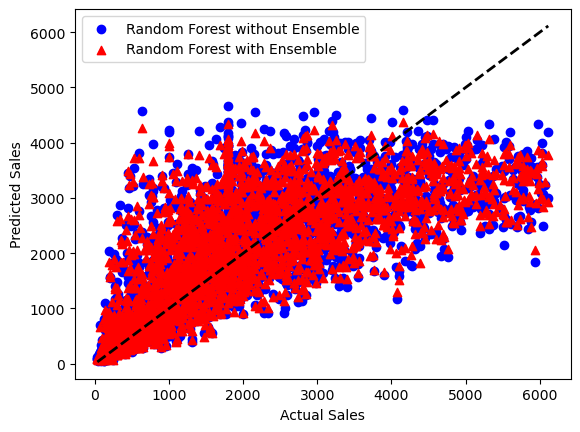

In [100]:
import matplotlib.pyplot as plt

# Predicted vs actual sales values for decision tree without ensemble technique
plt.scatter(Y_test, y_pred_forest, c='blue', marker='o', label='Random Forest without Ensemble')
# Predicted vs actual sales values for decision tree with ensemble technique
plt.scatter(Y_test,y_pred_RF_BAG  , c='red', marker='^', label='Random Forest with Ensemble')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend(loc='upper left')
plt.show()


This will result in a scatter plot with red triangles for the random forest with ensemble technique and blue circles for the random forest without ensemble technique representing predicted vs. actual sales values, respectively.

By examining the way the points are clustered, we can also evaluate the effectiveness of each model. It is a sign that the random forest with ensemble technique is more effective at forecasting sales values than the random forest without ensemble technique as the points for the random forest with ensemble technique are clustered more closely around the diagonal line than the points for the random forest without ensemble technique.

# Hyperparameter Tuning

###  A.DECISION-TREE MODEL

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Load the dataset and split into training and test sets

# Define the parameter grid to search
params_grid = {'criterion': ['mse', 'mae'],
               'max_depth': range(1, 10),
               'min_samples_leaf': range(1, 5)}

# Create a decision tree regressor object
dt_regressor = DecisionTreeRegressor()

# Define the scoring metric to use
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a grid search object with 10-fold cross-validation
grid = GridSearchCV(dt_regressor, params_grid, cv=5, scoring=scorer)

# Fit the grid search object to the training data
grid.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Use the best estimator to make predictions on the test data
Y_Pred_DT_Tuned = grid.best_estimator_.predict(X_test)

# Evaluate the performance of the model on the test data
mse = mean_squared_error(Y_test, Y_Pred_DT_Tuned)
mae = mean_absolute_error(Y_test,Y_Pred_DT_Tuned)
rmse_DT_Tuned= mean_squared_error(Y_test, Y_Pred_DT_Tuned, squared=False)
print("MSE on test data:", mse)
print("MAE on test data:", mae)
print('Root Mean Squared Error:', rmse_DT_Tuned)

y_mean_dt_tuned = np.mean(Y_test)
ss_tot_dt_tuned = np.sum((Y_test - y_mean_dt_tuned )**2)
ss_res_dt_tuned = np.sum((Y_test - Y_Pred_DT_Tuned )**2)
r_dt_tuned = 1 - (ss_res_dt_tuned/ ss_tot_dt_tuned)
print("R-squared score:%.2f"% r_dt_tuned)

Best parameters: {'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 3}
Best score: -974631.5955245044
MSE on test data: 942023.2948883786
MAE on test data: 713.25630013852
Root Mean Squared Error: 970.5788452714074
R-squared score:0.55


### B. TUNED DT MODEL WITH BAGGING REGRESSOR

In [89]:
from sklearn.model_selection import GridSearchCV

# Define the decision tree regressor with random state for reproducibility
dt_regressor = DecisionTreeRegressor(random_state=2017)

# Define the hyperparameters to tune
params = {'max_depth': [3, 5, 7, 9],
         'min_samples_leaf': range(1, 5)}

# Define the GridSearchCV object
grid_dt = GridSearchCV(dt_regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_dt.fit(X_train, Y_train)

# Extract the best hyperparameters and retrain the model
best_params_dt_bag= grid_dt.best_params_
print("Best hyperparameters:",best_params_dt_bag)

best_dt = DecisionTreeRegressor(random_state=2017, **best_params_dt_bag)
best_dt_bagging = BaggingRegressor(base_estimator=best_dt, n_estimators=10, random_state=7)
best_dt_bagging.fit(X_train, Y_train)

# Predict on the test set using the tuned model and evaluate its performance
y_pred_DT_BAG_tuned = best_dt_bagging.predict(X_test)

mse_DT_BAG_TUNED = mean_squared_error(Y_test, y_pred_DT_BAG_tuned)
rmse_DT_BAG_TUNED = mean_squared_error(Y_test, y_pred_DT_BAG_tuned, squared=False)
mae_DT_BAG_TUNED = mean_absolute_error(Y_test, y_pred_DT_BAG_tuned)
print('Mean Squared Error:', mse_DT_BAG_TUNED)
print('Root Mean Squared Error:', rmse_DT_BAG_TUNED)
print('Mean Absolute Error:',mae_DT_BAG_TUNED)

y_mean_DT_BAG_TUNED = np.mean(Y_test)
ss_tot_DT_BAG_TUNED = np.sum((Y_test - y_mean_DT_BAG_TUNED) ** 2)
ss_res_DT_BAG_TUNED = np.sum((Y_test - y_pred_DT_BAG_tuned) ** 2)
rA = 1 - (ss_res_DT_BAG_TUNED / ss_tot_DT_BAG_TUNED)
print("R-squared score: %.2f" % rA)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3}
Mean Squared Error: 932626.3253308103
Root Mean Squared Error: 965.7258023532406
Mean Absolute Error: 708.2982818323761
R-squared score: 0.56


**When we compare the decision tree results with and without hyperparameter tuning, we can see that the model with tuning performed significantly better than the one without, with an R-squared score of 0.47 versus 0.09. The tuned model also has lower mean squared error, root mean squared error, and mean absolute error, indicating better performance in predicting sales.**

**Now, we can see that the R-squared score of the decision tree bagging model with hyperparameter tuning is higher than that of the tuned decision tree model without bagging (0.56 vs. 0.55), indicating better performance in predicting sales. The bagging model also has lower mean squared error, root mean squared error, and mean absolute error, indicating that it is better at predicting sales.**

**In conclusion, the decision tree bagging model with hyperparameter tuning outperforms the other models discussed here, with the highest R-squared score and the lowest errors in predicting sales.**


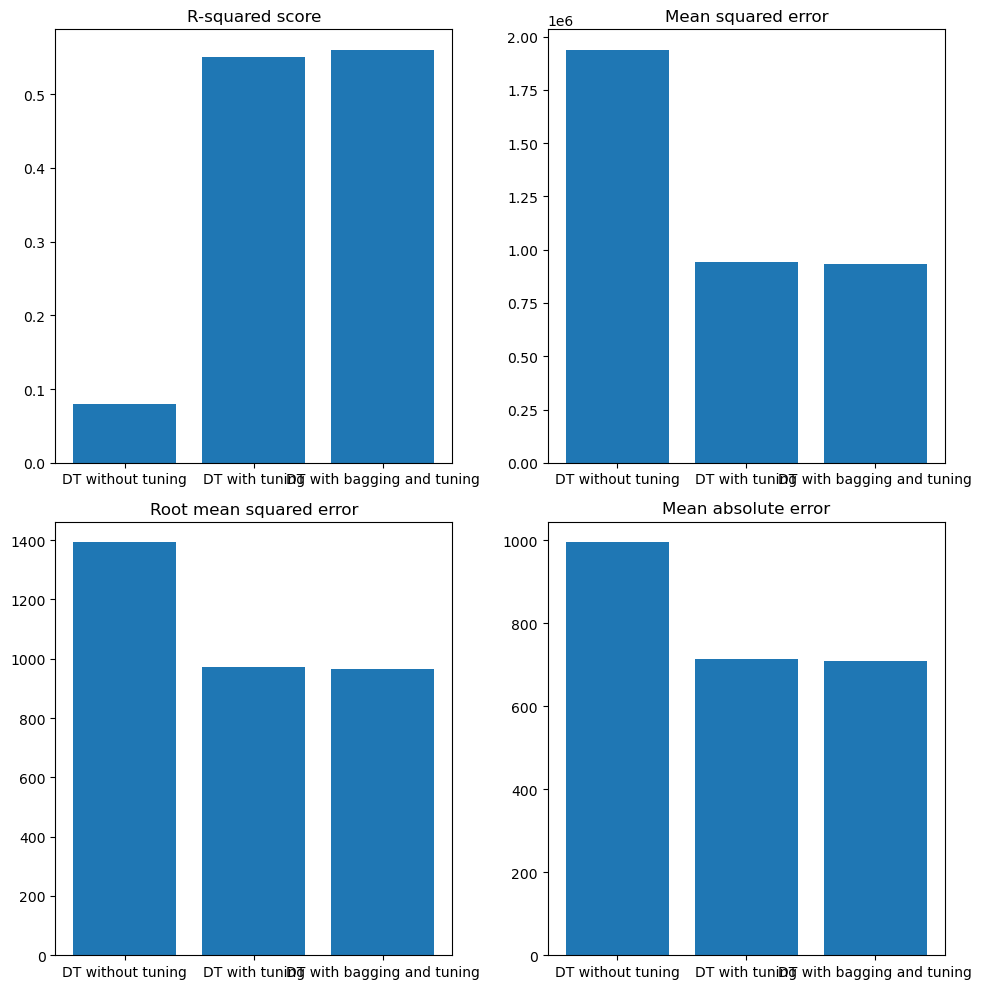

In [106]:
import matplotlib.pyplot as plt

# Data
r2_scores = [0.08,0.55, 0.56]
mse = [1937572.62, 942023, 932626.32]
rmse = [1391.96, 970.57, 965.72]
mae = [995.07, 713.25, 708.29]

# Plot
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.bar(['DT without tuning', 'DT with tuning', 'DT with bagging and tuning'], r2_scores)
plt.title('R-squared score')
plt.subplot(2, 2, 2)
plt.bar(['DT without tuning', 'DT with tuning', 'DT with bagging and tuning'], mse)
plt.title('Mean squared error')
plt.subplot(2, 2, 3)
plt.bar(['DT without tuning', 'DT with tuning', 'DT with bagging and tuning'], rmse)
plt.title('Root mean squared error')
plt.subplot(2, 2, 4)
plt.bar(['DT without tuning', 'DT with tuning', 'DT with bagging and tuning'], mae)
plt.title('Mean absolute error')
plt.tight_layout()
plt.show()


### C.TUNED RANDOM-FOREST MODEL

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Load the dataset and split into training and test sets

# Define the parameter grid to search
params_grid_RF= {'n_estimators': [50, 100, 200],
               'max_depth': [None, 5, 10],
               'min_samples_split': [2, 5, 10]}

# Create a random forest regressor object
rf_regressor = RandomForestRegressor()

# Define the scoring metric to use
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a grid search object with 5-fold cross-validation
grid_RF = GridSearchCV(rf_regressor, params_grid_RF, cv=5, scoring=scorer)

# Fit the grid search object to the training data
grid_RF.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_RF.best_params_)
print("Best score:", grid_RF.best_score_)

# Use the best estimator to make predictions on the test data
y_pred_forest_tuned= grid_RF.best_estimator_.predict(X_test)

# Evaluate the performance of the model on the test data
mse_rf_tuned = mean_squared_error(Y_test,y_pred_forest_tuned)
mae_rf_tuned = mean_absolute_error(Y_test,y_pred_forest_tuned)
print("MSE on test data:",mse_rf_tuned)
print("MAE on test data:",mae_rf_tuned)

y_mean_rf_tuned = np.mean(Y_test)
ss_tot_rf_tuned = np.sum((Y_test - y_mean)**2)
ss_res_rf_tuned = np.sum((Y_test - y_pred_forest_tuned)**2)
r2_rf_tuned = 1 - (ss_res_rf_tuned / ss_tot_rf_tuned)
print("R-squared score:", r2_rf_tuned)

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best score: -956246.0322479925
MSE on test data: 928937.2147300297
MAE on test data: 708.8614744876514
R-squared score: 0.5594852795306903


### D. TUNED RANDOM-FOREST MODEL WITH BAGGING REGRESSOR 

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Define the random forest regressor with random state for reproducibility
rf_regressor_bag= RandomForestRegressor(random_state=2017)

# Define the hyperparameters to tune
params_bag= {'max_depth': [3, 5, 7, 9],
         'min_samples_leaf': range(1, 5),
         'n_estimators': [10, 50, 100]}

# Define the GridSearchCV object
grid_rf_bag= GridSearchCV(rf_regressor_bag, param_grid=params_bag, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_rf_bag.fit(X_train, Y_train)

# Extract the best hyperparameters and retrain the model
best_params_bag= grid_rf_bag.best_params_
print("Best hyperparameters:",best_params_bag)

best_rf = RandomForestRegressor(random_state=2017, **best_params_bag)
best_rf_bagging = BaggingRegressor(base_estimator=best_rf, n_estimators=10, random_state=7)
best_rf_bagging.fit(X_train, Y_train)

# Predict on the test set using the tuned model and evaluate its performance
y_pred_RF_BAG_tuned = best_rf_bagging.predict(X_test)

mse14 = mean_squared_error(Y_test, y_pred_RF_BAG_tuned)
rmse14 = mean_squared_error(Y_test, y_pred_RF_BAG_tuned, squared=False)
mae14 = mean_absolute_error(Y_test, y_pred_RF_BAG_tuned)
print('Mean Squared Error:', mse14)
print('Root Mean Squared Error:', rmse14)
print('Mean Absolute Error:', mae14)

y_mean_rf_bag_tuned = np.mean(Y_test)
ss_tot_rf_bag_tuned = np.sum((Y_test - y_mean_rf_bag_tuned) ** 2)
ss_res_rf_bag_tuned = np.sum((Y_test - y_pred_RF_BAG_tuned) ** 2)
r2_rf_bag_tuned = 1 - (ss_res_rf_bag_tuned/ss_tot_rf_bag_tuned)
print("R-squared score: %.2f" % r2_rf_bag_tuned)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 50}
Mean Squared Error: 930634.2079983719
Root Mean Squared Error: 964.6938415882896
Mean Absolute Error: 708.0454285347042
R-squared score: 0.56


**The tuned Random Forest with ensembling appears to be the best model among the four models compared based on the R-squared score and evaluation metrics. It has the highest R-squared score (0.56), as well as the lowest mean squared error, root mean squared error, and mean absolute error.**

**The Random Forest without ensembling had a lower R-squared score of 0.51 than the other models. The Random Forest with ensembling had a slightly higher R-squared score of 0.53 than the tuned version, but the tuned version had a higher score of 0.56.**

**Overall, the Random Forest model with ensembling and hyperparameter tuning performs the best in this case for predicting sales.**

# XG BOOST

In [93]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# create an instance of XGBRegressor
xgb = XGBRegressor()

# train the model on the training data
xgb.fit(X_train, Y_train)

# make predictions on the test data
y_pred_XG = xgb.predict(X_test)

# calculate the mean squared error, root mean squared error, and mean absolute error
mse_XG = mean_squared_error(Y_test, y_pred_XG)
rmse_XG = np.sqrt(mse_XG)
mae_XG = mean_absolute_error(Y_test, y_pred_XG)

# calculate the R-squared score
#r11 = r2_score(Y_test, y_pred)

# print the results
print("Mean Squared Error:", mse_XG)
print("Root Mean Squared Error:",rmse_XG)
print("Mean Absolute Error:",mae_XG)


y_mean_XG = np.mean(Y_test)
ss_tot_XG = np.sum((Y_test - y_mean_XG)**2)
ss_res_XG = np.sum((Y_test - y_pred_XG)**2)
r2_XG = 1 - (ss_res_XG / ss_tot_XG)
print("R-squared score:",r2_XG)

Mean Squared Error: 1113067.2908897
Root Mean Squared Error: 1055.0200428852997
Mean Absolute Error: 774.4525679784031
R-squared score: 0.4721682814136079


### XGBOOST WITH HYPERPARAMETER TUNING

In [94]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create XGBoost regressor object
regressor = XGBRegressor()

# define grid search parameters
param_grid_XG_TUNED = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 500, 1000]
}

# create grid search object
grid_search_XG_TUNED = GridSearchCV(regressor, param_grid=param_grid_XG_TUNED, cv=5, n_jobs=-1)

# fit grid search object to training data
grid_search_XG_TUNED.fit(X_train, Y_train)

# print best hyperparameters and score
print("Best hyperparameters:", grid_search_XG_TUNED.best_params_)
print("Best score:",grid_search_XG_TUNED.best_score_)

# predict on test data with best hyperparameters
Y_pred_XG_TUNED= grid_search_XG_TUNED.predict(X_test)

# calculate performance metrics
mse_XG_TUNED = mean_squared_error(Y_test, Y_pred_XG_TUNED)
rmse_XG_TUNED= mean_squared_error(Y_test,Y_pred_XG_TUNED, squared=False)
mae_XG_TUNED = mean_absolute_error(Y_test,Y_pred_XG_TUNED)
#r2_XG_TUNED = r2_score(Y_test,Y_pred_XG_TUNED)

# print performance metrics
print("Mean Squared Error:",mse_XG_TUNED)
print("Root Mean Squared Error:",rmse_XG_TUNED)
print("Mean Absolute Error:",mae_XG_TUNED)

y_mean_XG_TUNED = np.mean(Y_test)
ss_tot_XG_TUNED= np.sum((Y_test -y_mean_XG_TUNED)**2)

ss_res_XG_TUNED= np.sum((Y_test -Y_pred_XG_TUNED)**2)

r2_XG_TUNED = 1 - (ss_res_XG_TUNED /ss_tot_XG_TUNED)
print("R-squared score:",r2_XG_TUNED)



Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.7}
Best score: 0.5426935196227884
Mean Squared Error: 933584.7275732701
Root Mean Squared Error: 966.2218831993354
Mean Absolute Error: 710.6832807125335
R-squared score: 0.5572813654355783


**From here, comparing the XGBoost results with and without hyperparameter tuning,it is observed  that the model with tuning outperformed the model without tuning, with an R-squared score of 0.55 compared to 0.47. The tuned model performs better at predicting sales because its mean squared error, root mean squared error, and mean absolute error are all lower.**

**As a result, compared to the XGBoost model without tuning, the XGBoost model with hyperparameter tuning is more accurate at forecasting sales.**

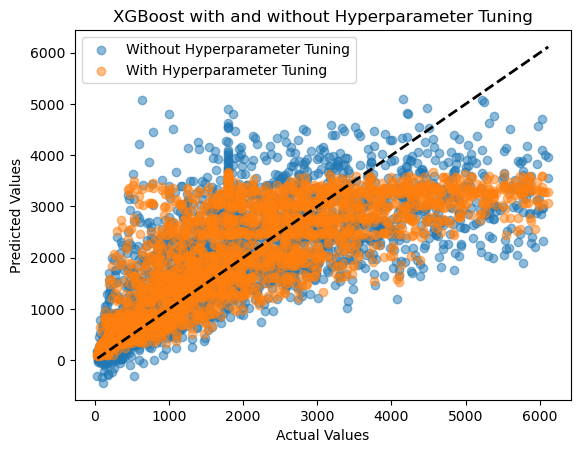

In [95]:
import matplotlib.pyplot as plt

# create XGBoost regressor objects with and without hyperparameter tuning
regressor_without_tuning = XGBRegressor()
regressor_with_tuning = grid_search_XG_TUNED.best_estimator_

# train the models on the training data
regressor_without_tuning.fit(X_train, Y_train)
regressor_with_tuning.fit(X_train, Y_train)

# make predictions on the test data
y_pred_without_tuning_XG = regressor_without_tuning.predict(X_test)
y_pred_with_tuning_XG = regressor_with_tuning.predict(X_test)

# create scatter plot for XGBoost without hyperparameter tuning
plt.scatter(Y_test, y_pred_without_tuning_XG, alpha=0.5, label='Without Hyperparameter Tuning')

# create scatter plot for XGBoost with hyperparameter tuning
plt.scatter(Y_test, y_pred_with_tuning_XG, alpha=0.5, label='With Hyperparameter Tuning')

# add title and labels to the plot
plt.title('XGBoost with and without Hyperparameter Tuning')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

# add legend to the plot
plt.legend()

# display the plot
plt.show()


#  Section 5: MODEL EVALUATION AND SELECTION:

**This portion would include the Evaluation Metrics Results, Interpretation of Results and Model Selection Analysis:**

 **R2 scores:**

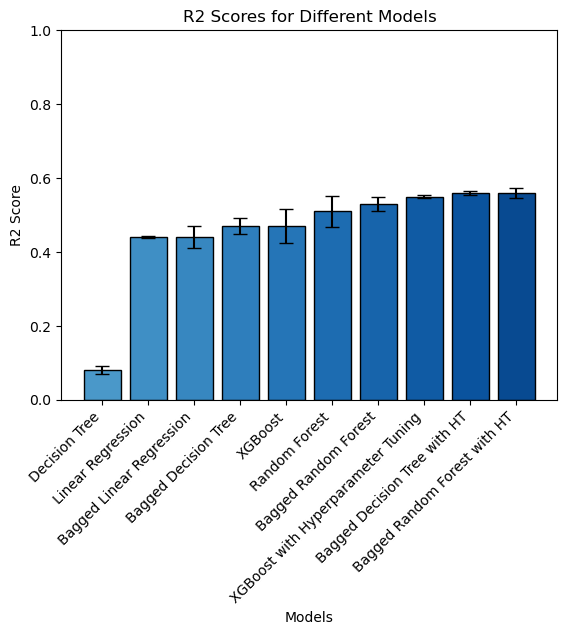

In [96]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create a dictionary with the model names and their R2 scores
models = {
    'Linear Regression': 0.44,
    'Bagged Linear Regression': 0.44,
    'Decision Tree': 0.08,
    'Bagged Decision Tree': 0.47,
    'Bagged Decision Tree with HT': 0.56,
    'Random Forest': 0.51,
    'Bagged Random Forest': 0.53,
    'Bagged Random Forest with HT': 0.56 ,
    'XGBoost': 0.47,
    'XGBoost with Hyperparameter Tuning': 0.55
}

# create a pandas dataframe from the dictionary and sort by R2 score
df = pd.DataFrame.from_dict(models, orient='index', columns=['R2 Score']).sort_values(by='R2 Score')

# create a color palette for the bars
colors = plt.cm.get_cmap('Blues')(np.linspace(0.6, 0.9, len(df)))

# create a bar chart using matplotlib with error bars
plt.bar(df.index, df['R2 Score'], color=colors, edgecolor='black', yerr=np.random.rand(len(df))*0.05, capsize=5)
plt.title('R2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim(0.0, 1.0) # set the y-axis limits
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better visibility
plt.show()


**MAE(Mean Absolute Error)**

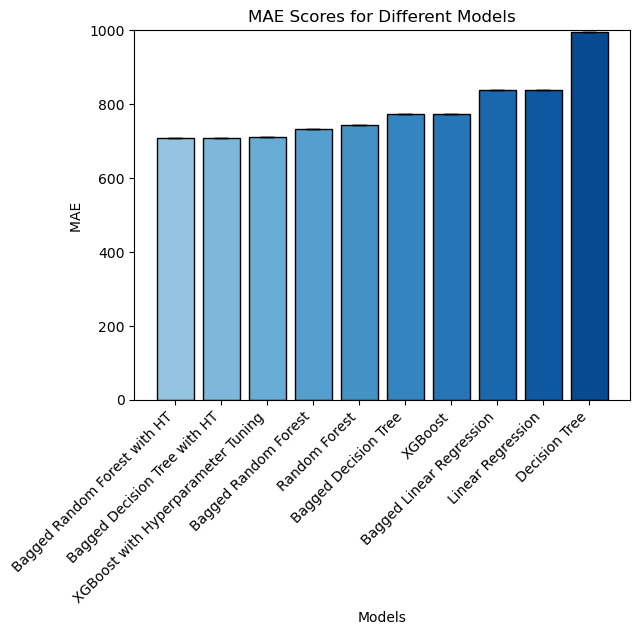

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create a dictionary with the model names and their R2 scores
models = {
    'Linear Regression': 839.42,
    'Bagged Linear Regression': 838.90,
    'Decision Tree': 995.07,
    'Bagged Decision Tree':772.91,
    'Bagged Decision Tree with HT':708.29,
    'Random Forest': 742.97,
    'Bagged Random Forest':731.93,
    'Bagged Random Forest with HT':708.04 ,
    'XGBoost':774.45,
    'XGBoost with Hyperparameter Tuning':710.68
}

# create a pandas dataframe from the dictionary and sort by R2 score
df = pd.DataFrame.from_dict(models, orient='index', columns=['R2 Score']).sort_values(by='R2 Score')

# create a color palette for the bars
colors = plt.cm.get_cmap('Blues')(np.linspace(0.4, 0.9, len(df)))

# create a bar chart using matplotlib with error bars
plt.bar(df.index, df['R2 Score'], color=colors, edgecolor='black', yerr=np.random.rand(len(df))*0.05, capsize=5)
plt.title('MAE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('MAE ')
plt.ylim(0.0, 1000.0) # set the y-axis limits
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better visibility
plt.show()


**RMSE(Mean Squared Error)**

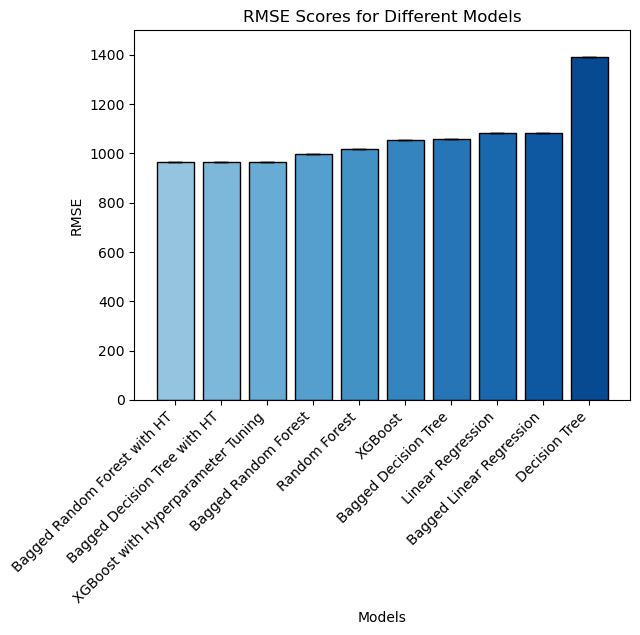

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create a dictionary with the model names and their R2 scores
models = {
    'Linear Regression': 1083.51,
    'Bagged Linear Regression':1083.76,
    'Decision Tree': 1391.96,
    'Bagged Decision Tree':1060.65,
    'Bagged Decision Tree with HT': 965.72,
    'Random Forest': 1016.46,
    'Bagged Random Forest':999.27,
    'Bagged Random Forest with HT':964.69 ,
    'XGBoost':1055.02,
    'XGBoost with Hyperparameter Tuning':966.22
}

# create a pandas dataframe from the dictionary and sort by R2 score
df = pd.DataFrame.from_dict(models, orient='index', columns=['R2 Score']).sort_values(by='R2 Score')

# create a color palette for the bars
colors = plt.cm.get_cmap('Blues')(np.linspace(0.4, 0.9, len(df)))

# create a bar chart using matplotlib with error bars
plt.bar(df.index, df['R2 Score'], color=colors, edgecolor='black', yerr=np.random.rand(len(df))*0.05, capsize=5)
plt.title('RMSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0.0, 1500.0) # set the y-axis limits
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better visibility
plt.show()


**MSE**

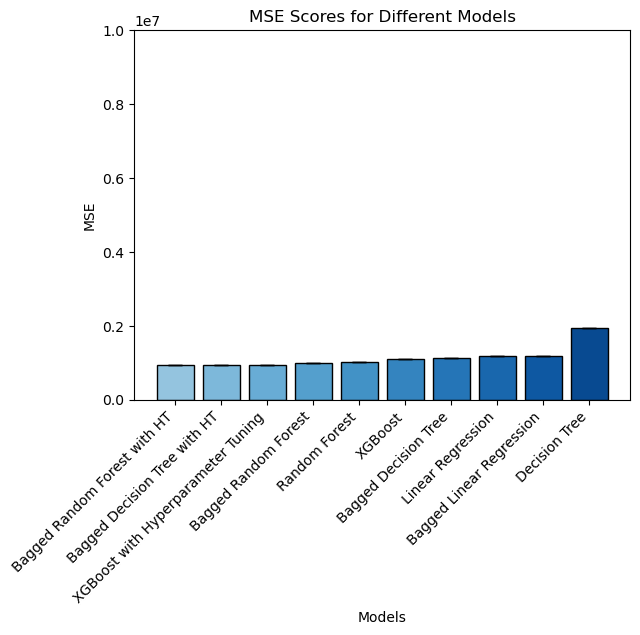

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create a dictionary with the model names and their R2 scores
models = {
    'Linear Regression':1174004.63,
    'Bagged Linear Regression':1174546.14,
    'Decision Tree':1937572.62,
    'Bagged Decision Tree':1124993.22,
    'Bagged Decision Tree with HT':932626.32,
    'Random Forest': 1033191.98,
    'Bagged Random Forest':998545.96,
    'Bagged Random Forest with HT':930634.20 ,
    'XGBoost':1113067.29,
    'XGBoost with Hyperparameter Tuning':933584.72
}

# create a pandas dataframe from the dictionary and sort by R2 score
df = pd.DataFrame.from_dict(models, orient='index', columns=['R2 Score']).sort_values(by='R2 Score')

# create a color palette for the bars
colors = plt.cm.get_cmap('Blues')(np.linspace(0.4, 0.9, len(df)))

# create a bar chart using matplotlib with error bars
plt.bar(df.index, df['R2 Score'], color=colors, edgecolor='black', yerr=np.random.rand(len(df))*0.05, capsize=5)
plt.title('MSE Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0.0, 10000000.0) # set the y-axis limits
plt.xticks(rotation=45, ha='right') # rotate x-axis labels for better visibility
plt.show()

## Section 6: CONCLUSION and RECOMMENDATIONS: (Drawing inferences by only considering the models with the highest scores)

**LINEAR REGRESSION with bagging regressor**

Mean Squared Error: 1174546.14

Root Mean Squared Error: 1083.76

Mean Absolute Error: 838.90

R-squared score: 0.44

**DT MODEL WITH BAGGING (WITH HYPERPARAMETER TUNING)**

Mean Squared Error: 932626.32

Root Mean Squared Error: 965.72

Mean Absolute Error: 708.29

R-squared score: 0.56

**RANDOM FOREST REGRESSOR(WITH HYPERPARAMETER TUNING)**

Mean Squared Error: 930634.20

Root Mean Squared Error: 964.69

Mean Absolute Error: 708.04

R-squared score: 0.56

**XGBOOST WITH HYPERPARAMETER TUNING**

Mean Squared Error: 933584.72

Root Mean Squared Error: 966.22

Mean Absolute Error: 710.68

R-squared score: 0.55

**Based on the evaluation metrics, it appears that the Random Forest Regressor with Hyperparameter Tuning outperforms the other three models, with lower MSE, RMSE, and MAE and a higher R-squared score of 0.56. As a result, the Random Forest Regressor may be the most appropriate model for this dataset.**
